# Student Performance Factors Analysis

In [57]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import LabelEncoder

In [58]:
# Set a customm palette
sns.set_palette("Set1")

In [59]:
# Loading the dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

In [60]:
# No. of rows and columns in the dataset
df.shape

(6607, 20)

In [61]:
# Columns of dataset
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [62]:
# Observing first 5 records
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [63]:
# Basic details like dtype and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [64]:
# Null values in percentage
df.isnull().sum()/len(df)*100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

## Descriptive Statistics

In [65]:
# Basic numerical calculations of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [66]:
# Checking Duplicate records
df.duplicated().sum()

0

In [67]:
# Datatype of columns
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [68]:
# Value counts of each column
for col in df:
    print(df[col].value_counts())
    print("-"*50)

Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
6      17
4      17
3      12
36     11
38      7
39      7
37      6
2       6
1       3
43      1
44      1
Name: count, dtype: int64
--------------------------------------------------
Attendance
67     190
98     187
76     185
77     184
64     182
94     180
84     175
79     175
91     175
82     173
68     170
69     170
80     169
81     168
96     168
73     168
93     167
72     167
74     165
78     165
61     164
95     163
89     162
71     162
97     161
70     161
65     158
83     157
90     156
88     155
63     155
99     154
92     154
62     152
86     151
87     151
75     149
85     146
66     145
60      87
100     81
Name: count, dtype: int64
-----------

#### Observation
- This dataset contains 6607 rows and 20 columns.
- 3 columns are contains null values but it is less then 5%.Therefore, as per empirical rule the missing value are less than 5% can be ignored.
- No duplicates found
- All the data types are correct and no need to change them.
- There are 13 categorical columns.
- There are 7 numerical columns.

### Univariate Analysis

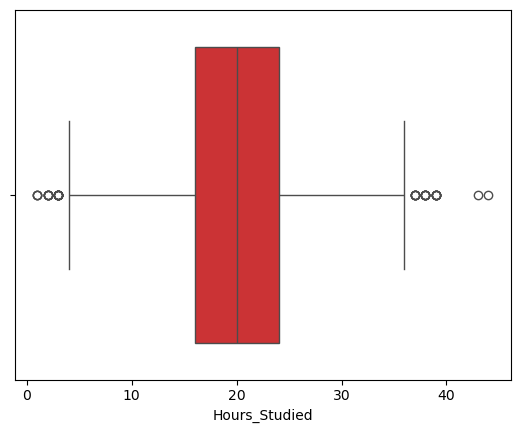

In [69]:
# Hours studied boxplot
sns.boxplot(data=df, x="Hours_Studied")
plt.show()

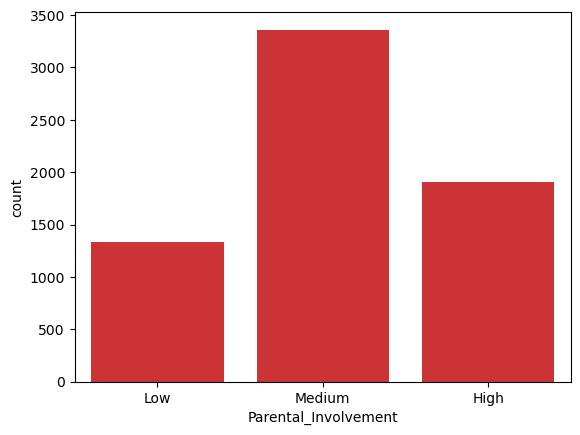

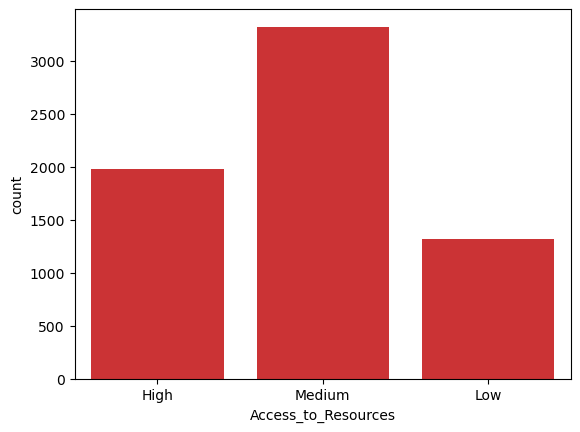

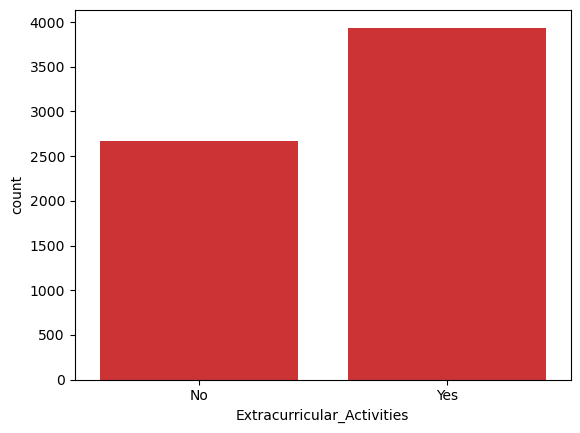

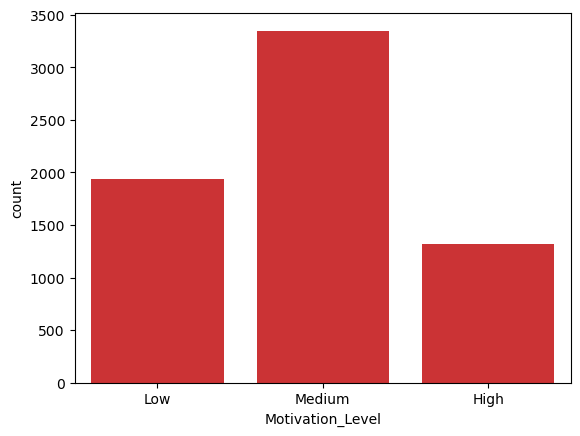

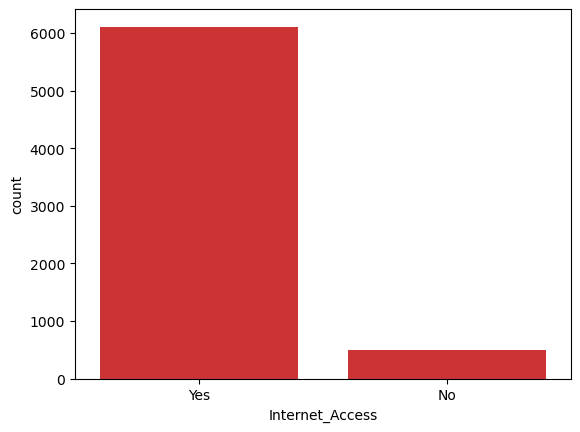

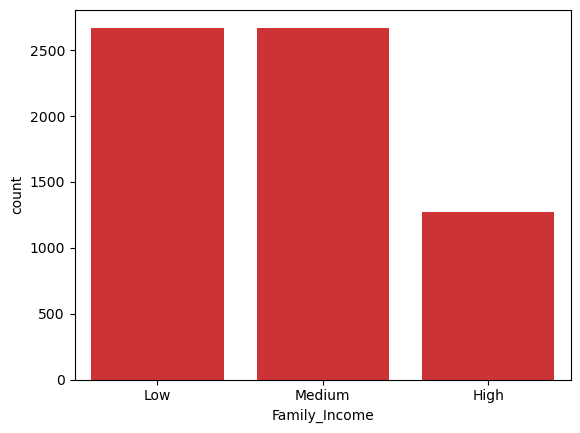

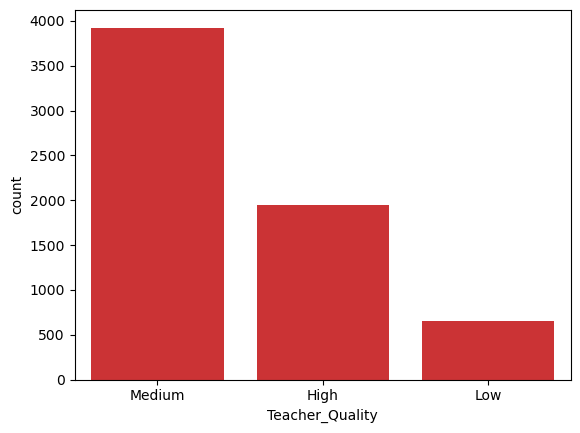

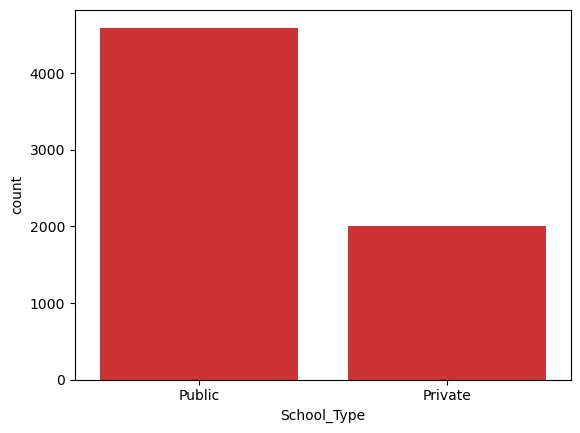

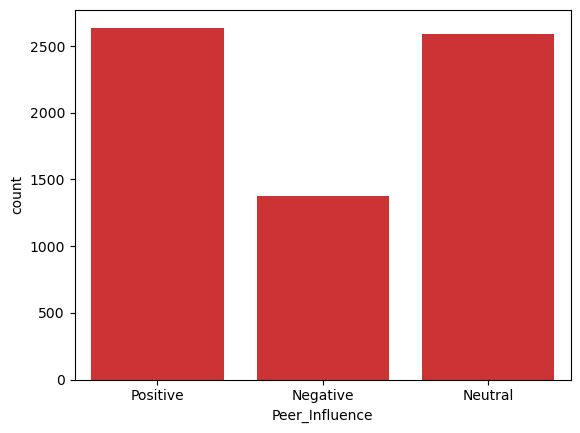

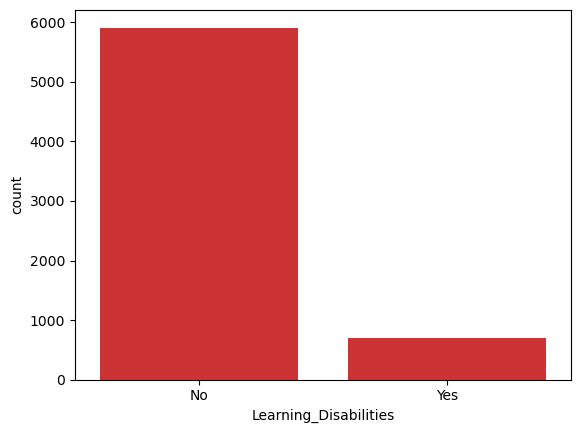

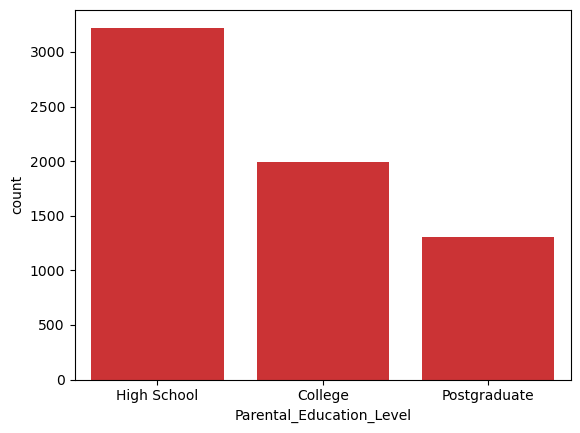

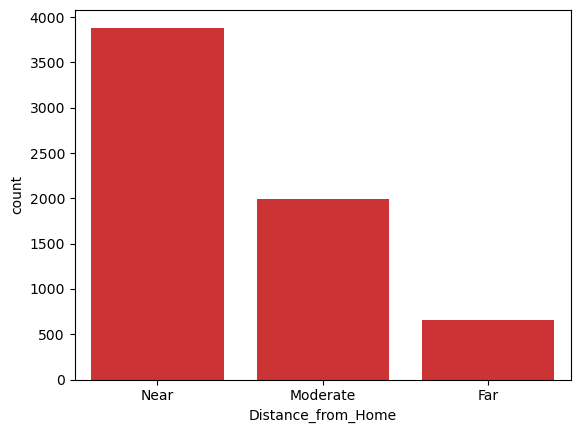

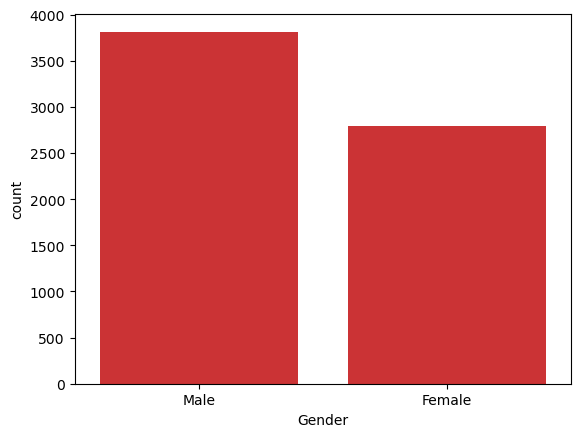

In [70]:
# Countplot for categorical data
cat_col = df.select_dtypes(include=["object"])
for col in cat_col:
    sns.countplot(x=col, data=cat_col)
    plt.show()

### Bivariate Analysis

In [71]:
cat_col.columns

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [72]:
# Converting categorical columns to numerical column (using dummy encoding)
df_encoded = pd.get_dummies(df, columns= cat_col.columns, drop_first=True)

In [73]:
# Caluculate the correlation matrix
corr_matrix = df_encoded.corr()

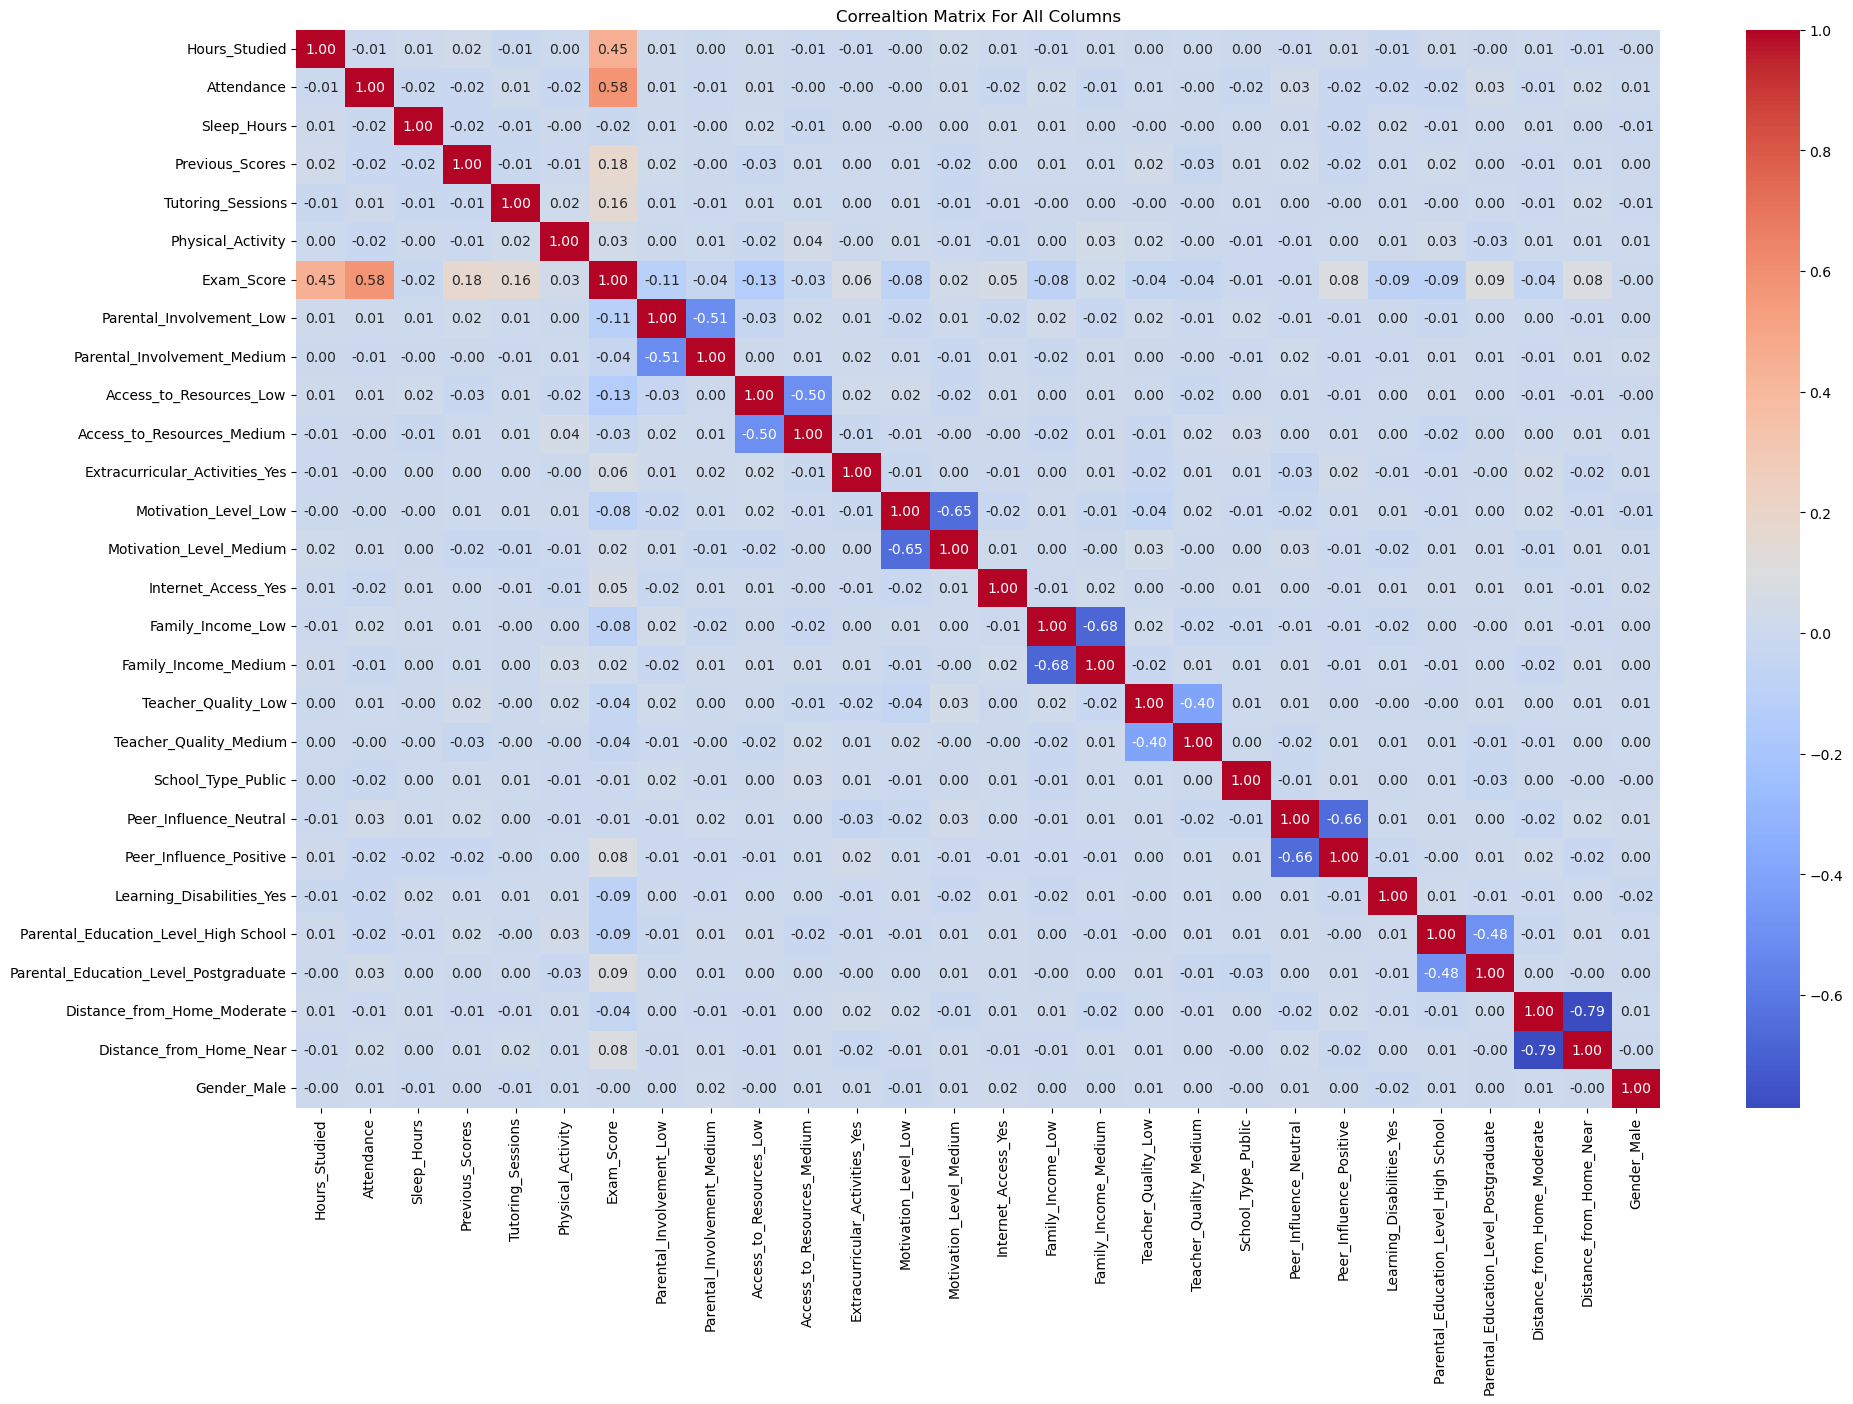

In [74]:
# Plotting the correlation matrix
plt.figure(figsize=(22,14))
sns.heatmap(corr_matrix, annot=True, fmt= ".2f", cmap="coolwarm")
plt.title("Correaltion Matrix For All Columns")
plt.show()

In [75]:
# Student scores with 90% attendance vs below 70%
st_90 = df[df["Attendance"] >= 90]
st_below70 = df[df["Attendance"] < 70]
avg_marks_above90 = st_90["Exam_Score"].mean()
avg_marks_below70 = st_below70["Exam_Score"].mean()
print('average marks for students with 90% and above attendance:', round(avg_marks_above90, 2))
print('average marks for students with below 70% attendance:',round(avg_marks_below70,2))

average marks for students with 90% and above attendance: 70.14
average marks for students with below 70% attendance: 64.21


#### Observation:
Identified a moderate positive correlation (r = 0.58) between attendance and exam scores, highlighting the significant influence of attendance on academic performance. 
Students with attendance above 90% achieved an average score of 70.14, while those with attendance below 70% scored an average of 64.21, 
reflecting a 9.2% improvement in performance with higher attendance.

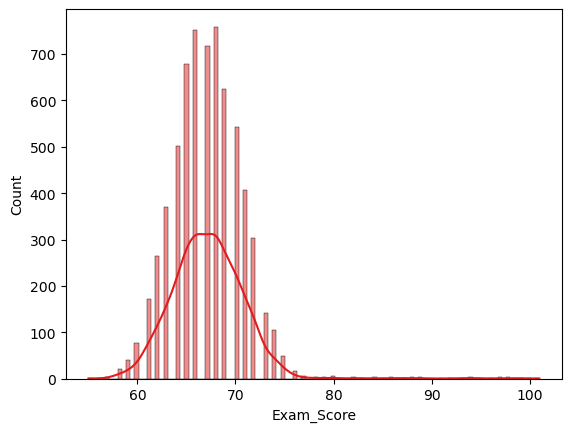

In [76]:
# Exam score distribution
sns.histplot(data=df, x="Exam_Score", kde=True)
plt.show()

In [77]:
exam_score_mean = df["Exam_Score"].mean()
exam_score_median = df["Exam_Score"].median()
exam_score_mode = df["Exam_Score"].mode()[0]
exam_score_std = statistics.stdev(df["Exam_Score"])
exam_score_variance = statistics.variance(df["Exam_Score"])

In [78]:
# Exam Score Statistics
print("mean of exam score:",exam_score_mean )
print("median of exam score:",exam_score_median)
print("mode of exam score:",exam_score_mode)
print("std dev of exam score:",exam_score_std)
print("variance of exam score:",exam_score_variance) 

mean of exam score: 67.23565914938702
median of exam score: 67.0
mode of exam score: 68
std dev of exam score: 3.890455781261732
variance of exam score: 15.135646185952833


## Student Behaviour Factors

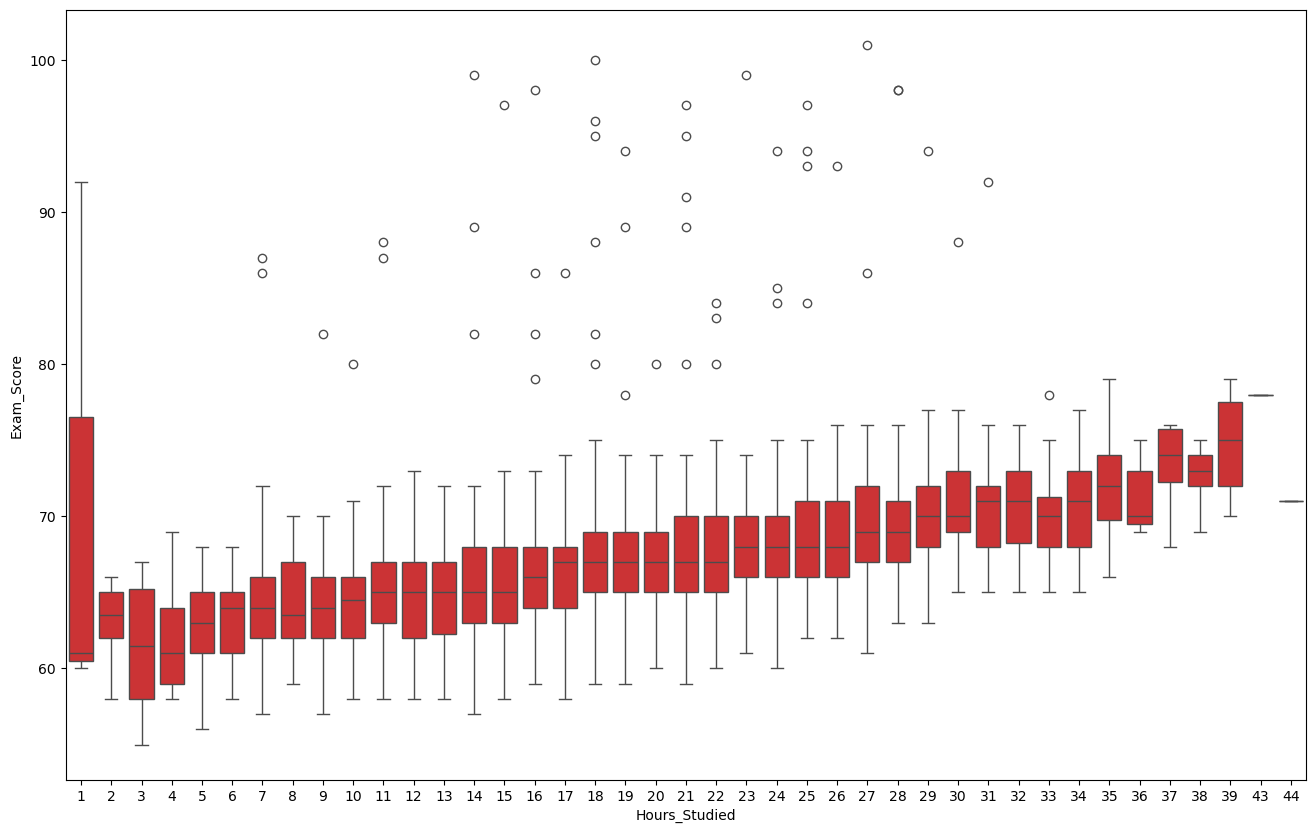

In [79]:
# Impact of study time on Exam_Score
plt.figure(figsize=(16,10))
sns.boxplot(data=df, x= "Hours_Studied", y="Exam_Score")
plt.show()

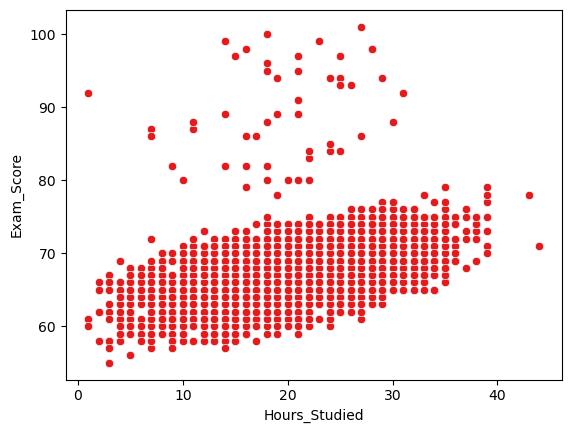

In [80]:
sns.scatterplot(data=df, x= "Hours_Studied", y="Exam_Score")
plt.show()

In [81]:
# Effect of Extracurricular Activities
df["Extracurricular_Activities"].value_counts()

Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

In [82]:
Extracurricular_df_yes = df[df['Extracurricular_Activities'] == 'Yes']

In [83]:
# Statistics for student score taking part in extracurricular activities
print("mean score:", Extracurricular_df_yes["Exam_Score"].mean())
print("median score:", Extracurricular_df_yes["Exam_Score"].median())
print("mode score:", Extracurricular_df_yes["Exam_Score"].mode()[0])
print("std dev score:", statistics.stdev(Extracurricular_df_yes["Exam_Score"]))
print("variance score:", statistics.variance(Extracurricular_df_yes["Exam_Score"]))

mean score: 67.44184865413915
median score: 67.0
mode score: 66
std dev score: 3.942860340046548
variance score: 15.54614766111198


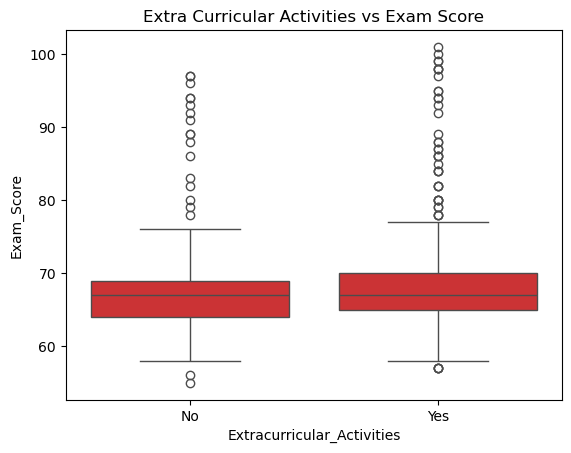

In [84]:
# Boxplot representing the impact of extracurricular activies in exam score
sns.boxplot(data=df, x="Extracurricular_Activities", y="Exam_Score")
plt.title("Extra Curricular Activities vs Exam Score")
plt.show()

### Family Factor

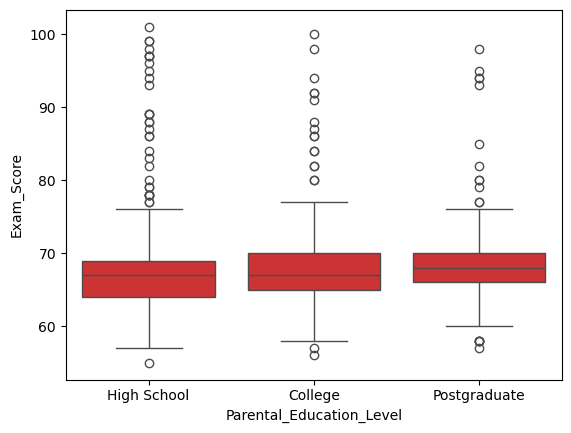

In [85]:
# Influence of Parental Education Level
sns.boxplot(data= df, x="Parental_Education_Level", y="Exam_Score")
plt.show()

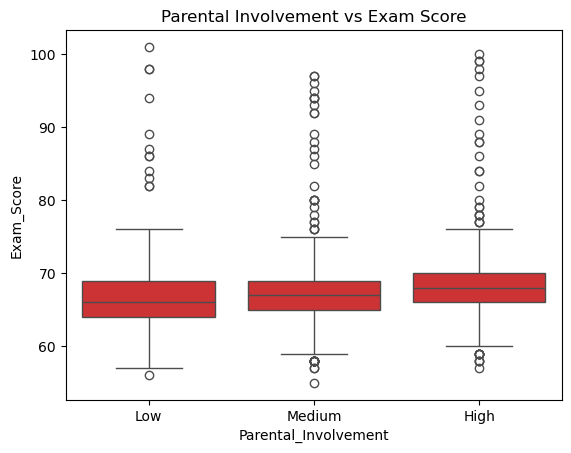

In [86]:
# Parental Involvement in Student's Education
sns.boxplot(data=df, x="Parental_Involvement", y="Exam_Score")
plt.title("Parental Involvement vs Exam Score")
plt.show()

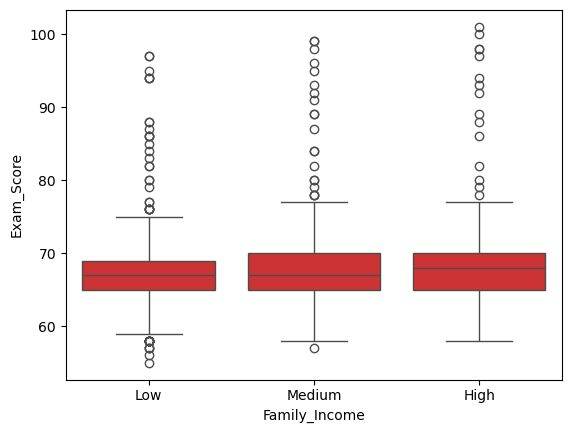

In [87]:
# Family Income Affecting the Exam Score
sns.boxplot(data= df, x="Family_Income", y= "Exam_Score")
plt.show()

### Personal Factors

In [88]:
# Comparison by Gender
df["Gender"].value_counts()/len(df["Gender"])*100

Gender
Male      57.726654
Female    42.273346
Name: count, dtype: float64

Exam Score analysis for male students

In [89]:
# Score Statistics
print("Mean:",df[df["Gender"] == "Male"]["Exam_Score"].mean())
print("Median",df[df["Gender"] == "Male"]["Exam_Score"].median())
print("Mode:",df[df["Gender"] == "Male"]["Exam_Score"].mode()[0])
print("Std Dev:",statistics.stdev(df[df["Gender"] == "Male"]["Exam_Score"]))
print("Variance:",statistics.variance(df[df["Gender"] == "Male"]["Exam_Score"]))

Mean: 67.22889355007865
Median 67.0
Mode: 67
Std Dev: 3.7663595746454637
Variance: 14.185464445523559


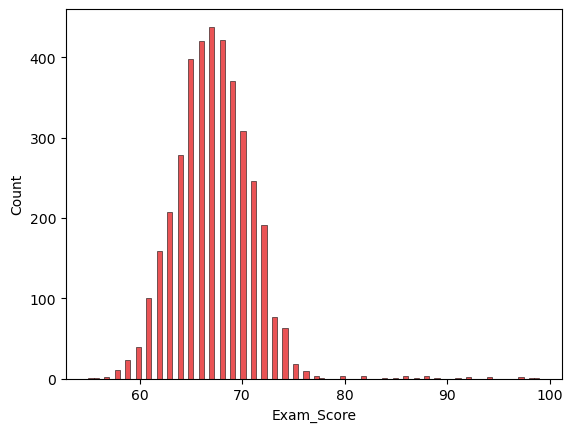

In [90]:
# Visual Spread of exam scores of male
sns.histplot(data= df[df["Gender"] == "Male"], x="Exam_Score")
plt.show()

`Exam Score analysis for female students

In [91]:
# Score Statistics
print("Mean:",df[df["Gender"] == "Female"]["Exam_Score"].mean())
print("Median",df[df["Gender"] == "Female"]["Exam_Score"].median())
print("Mode:",df[df["Gender"] == "Female"]["Exam_Score"].mode()[0])
print("Std Dev:",statistics.stdev(df[df["Gender"] == "Female"]["Exam_Score"]))
print("Variance:",statistics.variance(df[df["Gender"] == "Female"]["Exam_Score"]))

Mean: 67.24489795918367
Median 67.0
Mode: 68
Std Dev: 4.0544507450221055
Variance: 16.438570843810304


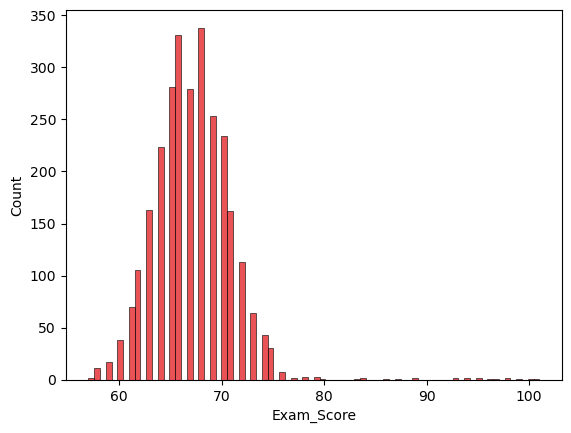

In [92]:
# Visual Spread of exam scores of female
sns.histplot(data= df[df["Gender"] == "Female"], x="Exam_Score")
plt.show()

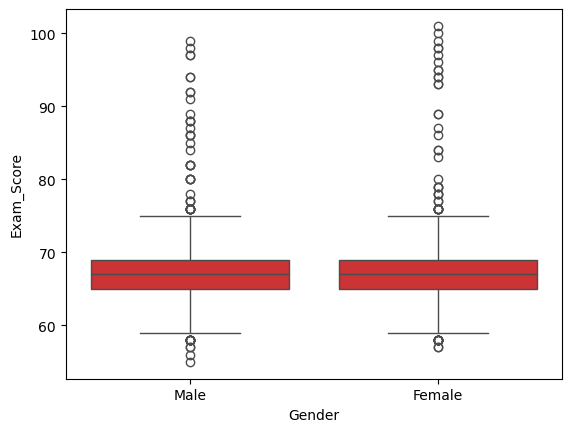

In [93]:
# Visualof both the genders exam score
sns.boxplot(data=df, x="Gender", y="Exam_Score")
plt.show()

In [94]:
# Analysis of Exam score on basis of motivation level and teacher quality
pivot = df.pivot_table(values="Exam_Score", index="Motivation_Level", columns="Teacher_Quality", aggfunc="mean")
print(pivot)

Teacher_Quality        High        Low     Medium
Motivation_Level                                 
High              68.283951  67.029851  67.552803
Low               67.335052  65.948718  66.572890
Medium            67.628125  66.994550  67.254912


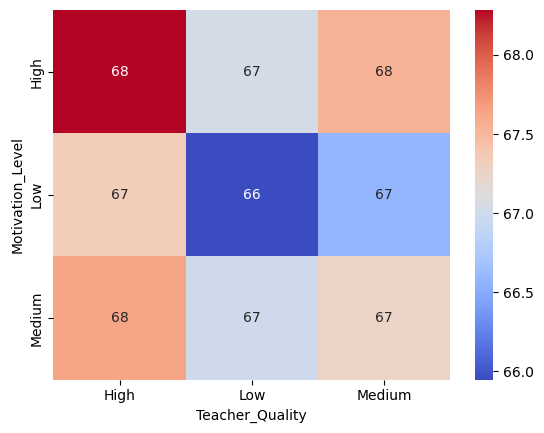

In [95]:
# Visual representation of above analysis
sns.heatmap(pivot, annot=True, cmap="coolwarm")
plt.show()

Analysis Of Failures

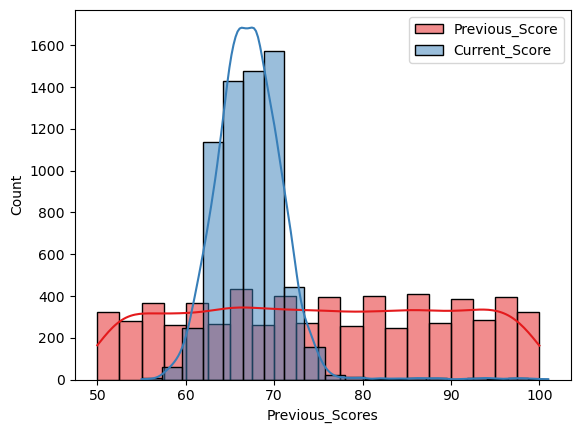

In [96]:
# Visualisation of previour score and current score
sns.histplot(df["Previous_Scores"], kde= True, bins=20, label = "Previous_Score")
sns.histplot(df["Exam_Score"], kde=True, bins=20, label = "Current_Score")
plt.legend()
plt.show()

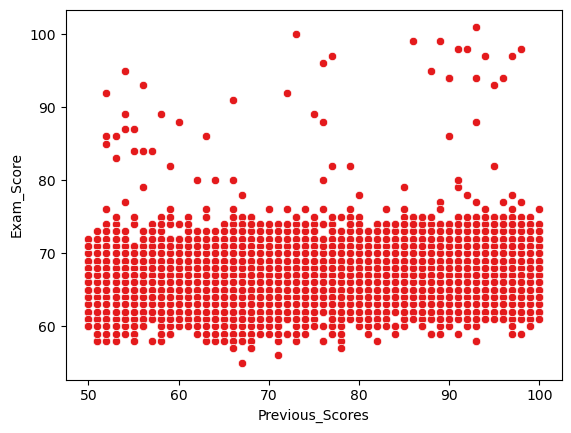

In [97]:
# Relationship between Previous score and Current Exam Score
sns.scatterplot(x="Previous_Scores", y="Exam_Score", data=df)
plt.show()

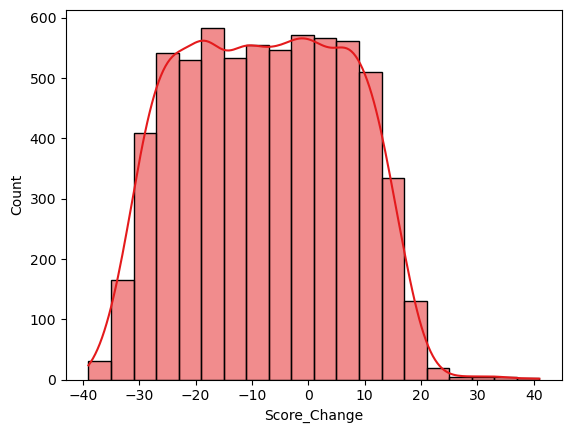

In [98]:
# Histogram of Change in score
df["Score_Change"]= df["Exam_Score"]- df["Previous_Scores"]
sns.histplot(df["Score_Change"], kde=True, bins=20)
plt.show()

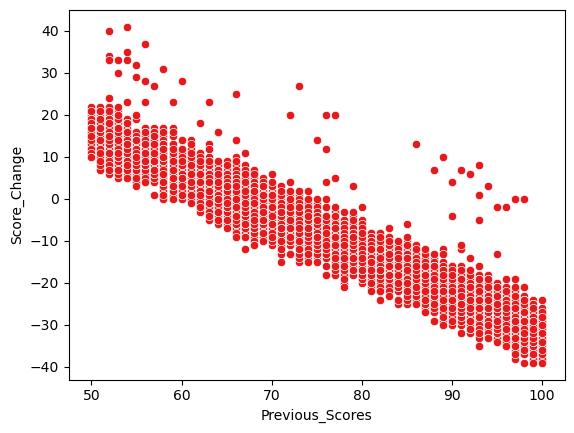

In [99]:
sns.scatterplot(data=df, x="Previous_Scores", y="Score_Change")
plt.show()

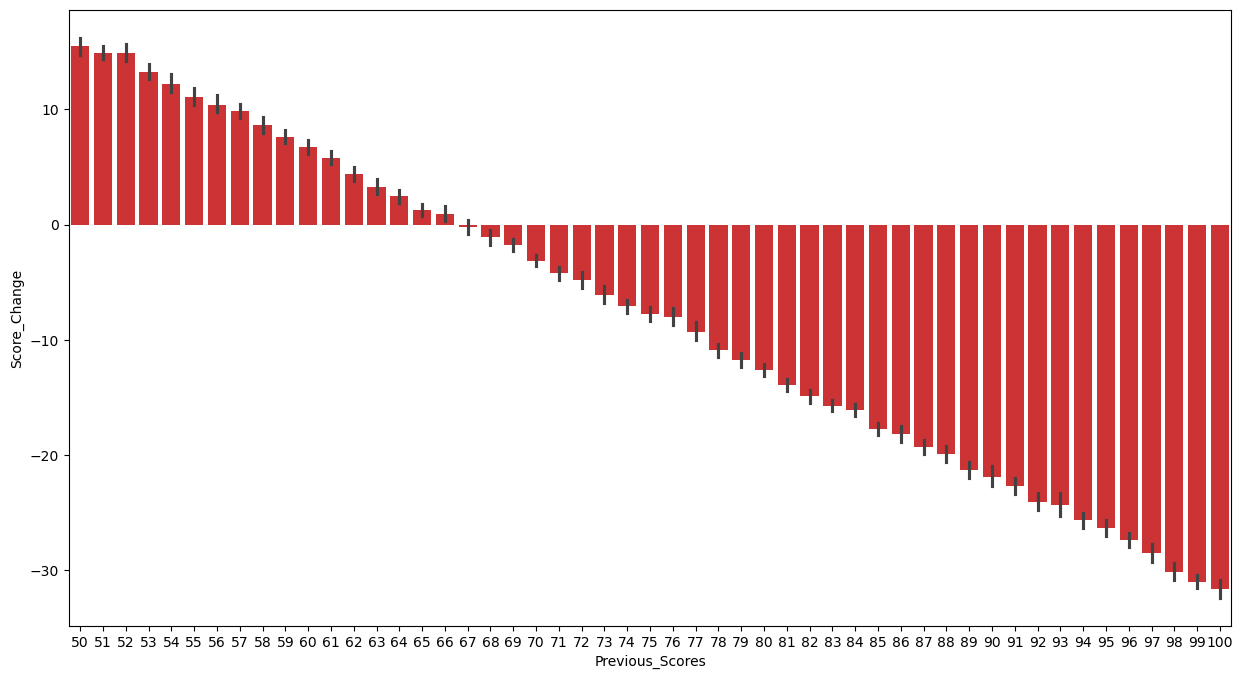

In [100]:
plt.figure(figsize=(15,8))
sns.barplot(x="Previous_Scores", y="Score_Change", data=df)
plt.show()

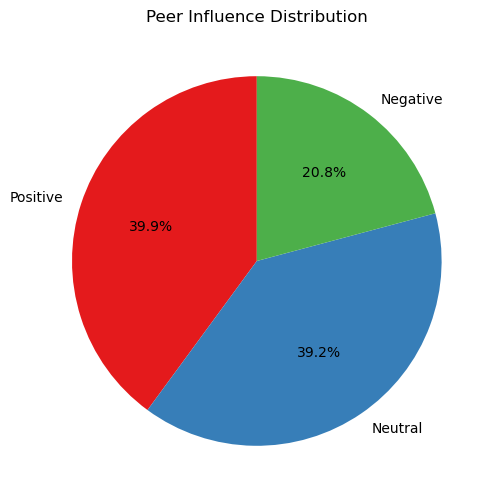

In [101]:
# Infulence of Peers
peer_influence = df["Peer_Influence"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(peer_influence, labels= peer_influence.index, autopct="%1.1f%%", startangle=90)
plt.title("Peer Influence Distribution")
plt.show()

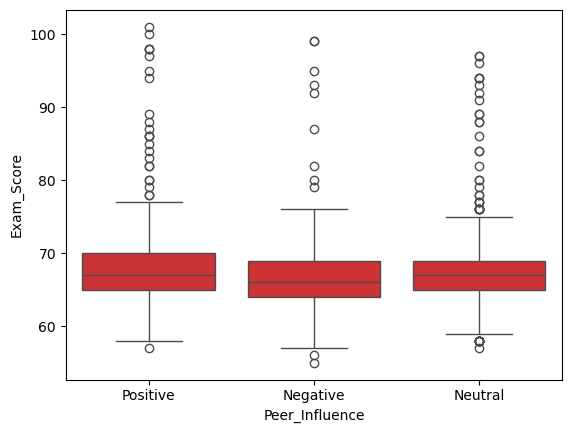

In [102]:
# Distribution of Exam Score on the basis of Peer Influence
sns.boxplot(data=df, x="Peer_Influence", y="Exam_Score")
plt.show()

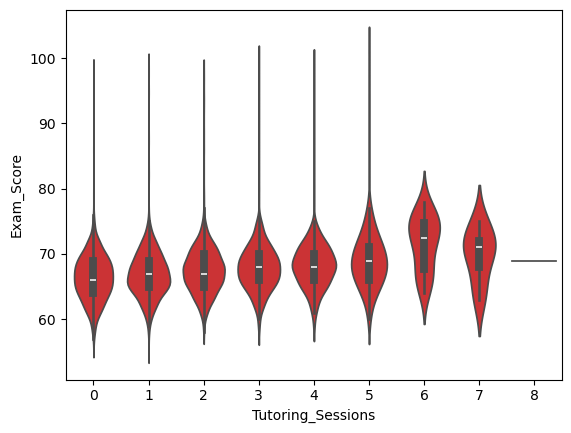

In [103]:
# Impact of Tutoring_Sessions on Exam Score
sns.violinplot(x="Tutoring_Sessions", y="Exam_Score", data=df)
plt.show()